In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [90]:
df = pd.read_csv("C:/Users/Akhil/Desktop/ASSIGNMENTS/Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [91]:
df.shape

(400, 11)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [93]:
A = df.Sales.values
A

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [94]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [96]:
B = pd.cut(A,[0,7.8,16.5],labels=["Bad","Good"])
B

['Good', 'Good', 'Good', 'Bad', 'Bad', ..., 'Good', 'Bad', 'Bad', 'Bad', 'Good']
Length: 400
Categories (2, object): ['Bad' < 'Good']

In [97]:
B.value_counts()

Bad     227
Good    172
dtype: int64

In [98]:
C = pd.DataFrame(B,columns=["Sales1"])
C.isna().value_counts()

Sales1
False     399
True        1
dtype: int64

<AxesSubplot:>

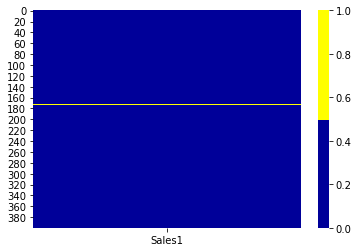

In [99]:
colors = ['#000099','#ffff00']
sns.heatmap(C.isnull(),cmap=sns.color_palette(colors))

In [101]:
C[C.isnull().any(axis=1)]

,Sales1
174,NaN


In [102]:
D = pd.concat([df,C],axis=1)
D

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Bad
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Bad
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Bad


In [103]:
E = D.drop("Sales",axis=1)
E

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,139,23,3,37,120,Medium,55,11,No,Yes,Bad
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Bad
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Bad


In [107]:
F = E.dropna()
F

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,139,23,3,37,120,Medium,55,11,No,Yes,Bad
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Bad
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Bad


In [108]:
F.isna().value_counts()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age    Education  Urban  US     Sales1
False      False   False        False       False  False      False  False      False  False  False     399
dtype: int64

In [109]:
X1 = F.iloc[:,0:10]
X1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [112]:
Y = F.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399    Good
Name: Sales1, Length: 399, dtype: category
Categories (2, object): ['Bad' < 'Good']

In [113]:
Z = X1.iloc[:,[5,8,9]]
Z

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [114]:
IN = Z.apply(preprocessing.LabelEncoder().fit_transform)
IN

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0
...,...,...,...
395,1,1,1
396,2,0,1
397,2,1,1
398,0,1,1


In [115]:
X2 = X1.drop(["ShelveLoc","Urban","US"],axis=1)
X2

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14
396,139,23,3,37,120,55,11
397,162,26,12,368,159,40,18
398,100,79,7,284,95,50,12


In [116]:
X = pd.concat([X2,IN],axis=1)
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,2,0,1
397,162,26,12,368,159,40,18,2,1,1
398,100,79,7,284,95,50,12,0,1,1


In [117]:
X.isna().value_counts()

CompPrice  Income  Advertising  Population  Price  Age    Education  ShelveLoc  Urban  US   
False      False   False        False       False  False  False      False      False  False    399
dtype: int64

In [118]:
Y.isna().value_counts()

False    399
Name: Sales1, dtype: int64

In [119]:
x = X.values
x

array([[138,  73,  11, ...,   0,   1,   1],
       [111,  48,  16, ...,   1,   1,   1],
       [113,  35,  10, ...,   2,   1,   1],
       ...,
       [162,  26,  12, ...,   2,   1,   1],
       [100,  79,   7, ...,   0,   1,   1],
       [134,  37,   0, ...,   1,   1,   1]], dtype=int64)

In [120]:
y = Y.values
y

['Good', 'Good', 'Good', 'Bad', 'Bad', ..., 'Good', 'Bad', 'Bad', 'Bad', 'Good']
Length: 399
Categories (2, object): ['Bad' < 'Good']

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [123]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(181.35000000000002, 190.26, 'X[4] <= 135.5\nentropy = 0.991\nsamples = 319\nvalue = [177, 142]'),
 Text(111.60000000000001, 135.9, 'X[2] <= 6.5\nentropy = 1.0\nsamples = 264\nvalue = [130, 134]'),
 Text(55.800000000000004, 81.53999999999999, 'X[5] <= 63.5\nentropy = 0.926\nsamples = 129\nvalue = [85, 44]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.991\nsamples = 92\nvalue = [51, 41]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.406\nsamples = 37\nvalue = [34, 3]'),
 Text(167.4, 81.53999999999999, 'X[7] <= 0.5\nentropy = 0.918\nsamples = 135\nvalue = [45, 90]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.938\nsamples = 31\nvalue = [20, 11]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.796\nsamples = 104\nvalue = [25, 79]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 62.5\nentropy = 0.598\nsamples = 55\nvalue = [47, 8]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(279.0, 81.53999999999999, 'X[5] <= 34

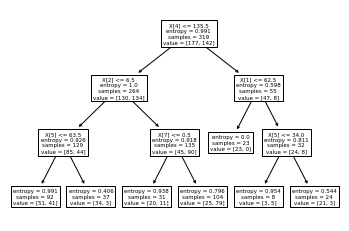

In [124]:
tree.plot_tree(model)

In [125]:
from sklearn.tree import plot_tree

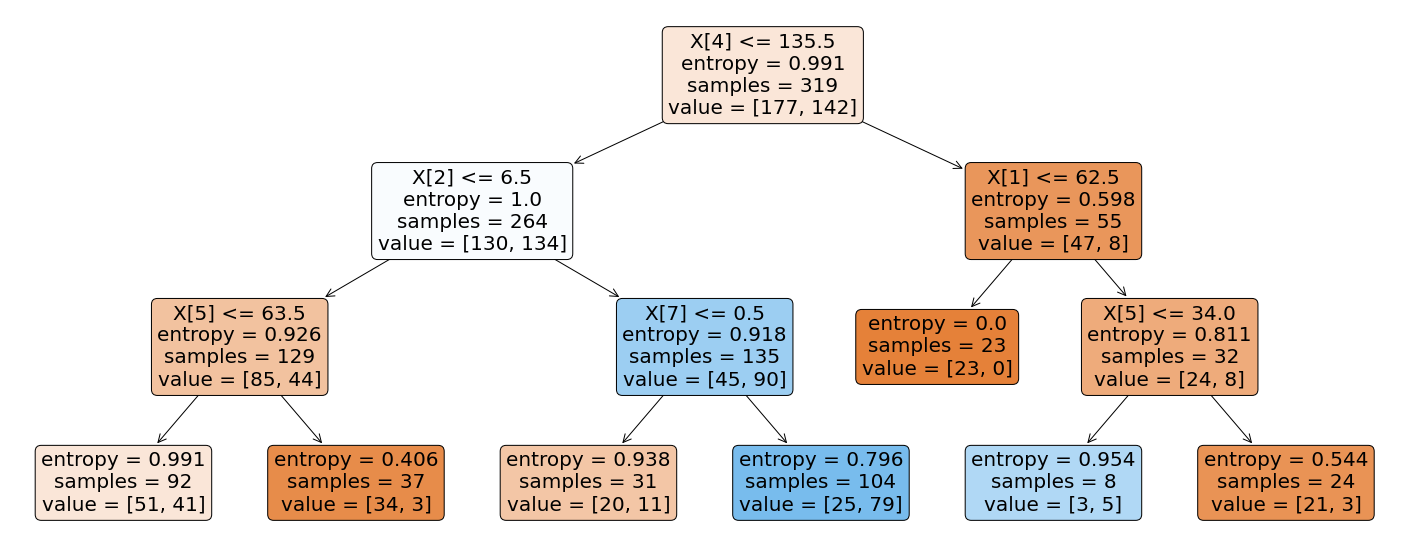

In [129]:
plt.figure(figsize=(25,10))
a = plot_tree(model,filled=True,rounded=True,fontsize=20)

In [132]:
preds = model.predict(x_test)
preds

array(['Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad',
       'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good'],
      dtype=object)

In [136]:
pd.Series(preds).value_counts()

Bad     58
Good    22
dtype: int64

In [137]:
np.mean(preds==y_test)

0.7

In [138]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

         Bad       0.84      0.72      0.78        58
        Good       0.47      0.64      0.54        22

    accuracy                           0.70        80
   macro avg       0.65      0.68      0.66        80
weighted avg       0.74      0.70      0.71        80

